In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
from typing import Tuple

# Task 1: Probability
In this task I am going to solve robitcs probability tasks.

## Task 1.1: Plot probability density function
Let's plot the probability density function of a one dimensional Gaussian distribution $\mathcal{N}(x, 1, 1)$.

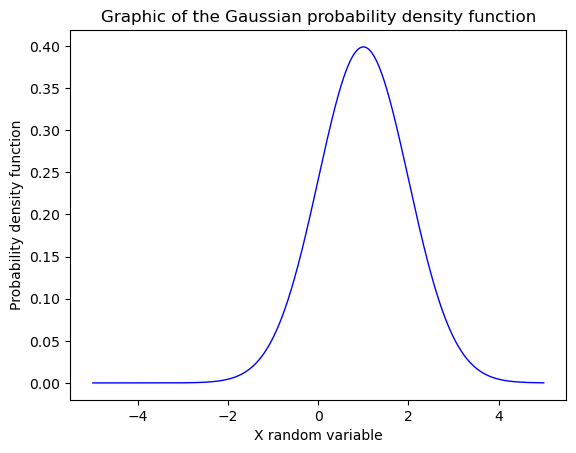

In [3]:
plt.figsize=(5,10)
x = np.linspace(-5, 5, 100001)
plt.plot(x, norm.pdf(x, 1, 1),
        'b-', lw=1, alpha=1)
plt.xlabel('X random variable')
plt.ylabel('Probability density function')
plt.title('Graphic of the Gaussian probability density function')
plt.show()

## Task 1.2: Calculation of the probability mass
Lett's calculate the probability mass that random variable $X$ is less than 0 

First of all, let's plot the cumulative distribution function for the whole distribution.

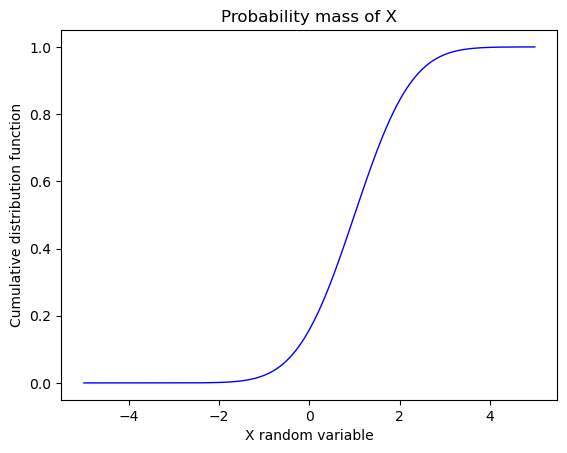

In [4]:
x_plot = np.linspace(-5, 5, 10000)
plt.figsize=(5,10)
plt.plot(x_plot, norm.cdf(x_plot, 1, 1),
        'b-', lw=1, alpha=1)
plt.xlabel('X random variable')
plt.ylabel('Cumulative distribution function')
plt.title('Probability mass of X')
plt.show()

Next, plot the part of the function, where random variable X is lower than 0.

In [5]:
x_greater_zero = np.linspace(-5000, 0, 100000)
cdf = norm.cdf(x_greater_zero, 1, 1)

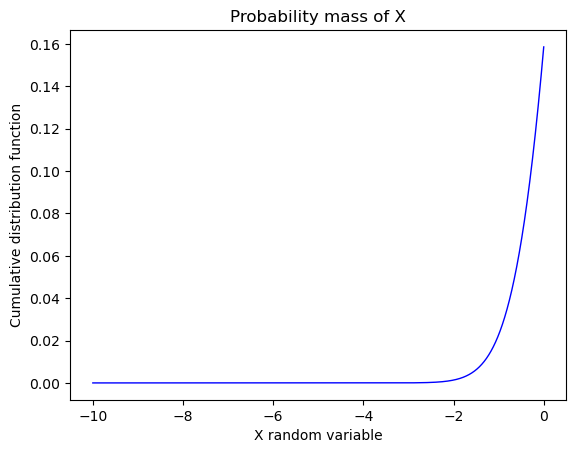

In [6]:
x_plot = np.linspace(-10, 0, 10000)
plt.figsize=(5,10)
plt.plot(x_plot, norm.cdf(x_plot, 1, 1),
        'b-', lw=1, alpha=1)
plt.xlabel('X random variable')
plt.ylabel('Cumulative distribution function')
plt.title('Probability mass of X')
plt.show()

Finally, let's calculate the value of cdf. We cannot built cdf from $- \infty$ to 0, so, I chose the left boarder as -5000. I have checked with the left boarder equal to -5 and the value of cdf has difference less than $10^{-6}$.

In [7]:
print('CDF value of random variable X with Gaussian distribution with mean and variance equal to 1 is:     ', np.round(cdf[-1], 6))

CDF value of random variable X with Gaussian distribution with mean and variance equal to 1 is:      0.158655


So, the probability mass that $X \leq 0$ is equal to: $0.158655$.  

## Task 1.3: Bayes theorem
We have new observation variable z. It gives information about x by the likelihood function $p(z|x) = \mathcal{N}(z, x, \sigma^2)$, with variance $\sigma^2$ = 0.2. Let's derive and plot posterior distribution $p(x|z)$, given an observation z = 0.75. 

$p(x) = \mathcal{N}(x, 1, 1)$ <br>
$p(z|x) = \mathcal{N}(z, x, \sigma^2)$ <br>
Using Bayes' theorem we will have: $p(x|z) = \eta * p(z|x) p(x)$, where $\eta$ - is normalization coefficient.
$p(x|z) = \eta\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(x - 1)^2}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\frac{(z - x)^2}{\sigma^2}} = \eta\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(x - 1)^2}\frac{1}{\sqrt{2\pi0.2^2}}e^{-\frac{1}{2}\frac{(0.75 - x)^2}{0.2^2}}= \eta\frac{1}{2\pi}\frac{1}{\sqrt{0.2}}e^{-\frac{1}{2}\left[(x-1)^2 + \frac{(x-0.75)^2}{0.2}\right]}$ <br>
$\beta = \frac{0.2x^2 - 2 * 0.2 + 0.2 + x^2 - 2 * 0.75 + 0.75^2}{2 * 0.2} = \frac{(0.2 + 1)x^2 - 2(0.2 + 0.75)x + (0.2 + 0.75^2)}{2 * 0.2} = \frac{x^2 - 2\frac{0.2 + 0.75}{0.2 + 1} + \frac{0.2 + 0.75^2}{0.2 + 1}}{2\frac{0.2}{0.2 + 1}} = \frac{x^2 -2\frac{0.2 + 0.75}{0.2 + 1}x + \frac{0.2 + 0.75^2}{0.2 + 1}}{2\frac{0.2}{0.2 + 1}} = \frac{(x - \frac{0.2 + 0.75}{0.2 + 1})^2}{2\frac{0.2}{0.2 + 1}} + \frac{\frac{0.2 + 0.75^2}{0.2 + 1} - (\frac{0.2 + 0.75}{0.2 + 1})^2}{2\frac{0.2}{0.2 + 1}}  = \frac{(x - \frac{0.2 + 0.75}{0.2 + 1})^2}{2\frac{0.2}{0.2 + 1}} + \frac{(1 - 0.75)^2}{2(0.2 +1)}\Rightarrow$ <br>
$p(x|z) = \eta \frac{1}{2\pi\sqrt{0.2}}e^{-\frac{1}{2}\frac{(x - \frac{0.2 + 0.75}{0.2 + 1})^2}{\frac{0.2}{0.2 + 1}}}e^{-\frac{1}{2}\frac{(1 - 0.75)^2}{(0.2 +1)}}$ <br>
Now, we have thing which is similar to gaussian. So, we have: <br>
$\mu_{x|z} = \frac{0.2 + 0.75}{0.2 + 1}$, $\sigma^2 = \frac{0.2}{0.2 + 1}$
So, the distribution of $p(x|z)$ will be: <br>
$p(x|z) = \frac{1}{\sqrt{2\pi\frac{0.2}{0.2 + 1}}}e^{-\frac{1}{2}\frac{(x - \frac{0.2 + 0.75}{0.2 + 1})^2}{\frac{0.2}{0.2 + 1}}}$ <br>
Let's calculate the normalization factor: <br>
$p(x|z) = \eta \frac{1}{2\pi\sqrt{0.2}}e^{-\frac{1}{2}\frac{(x - \frac{0.2 + 0.75}{0.2 + 1})^2}{\frac{0.2}{0.2 + 1}}}e^{-\frac{1}{2}\frac{(1 - 0.75)^2}{(0.2 +1)}}= \eta\frac{1}{\sqrt{2\pi\frac{0.2}{0.2 + 1}}}\frac{1}{\sqrt{2\pi(0.2 + 1)}}e^{-\frac{1}{2}\frac{(x - \frac{0.2 + 0.75}{0.2 + 1})^2}{\frac{0.2}{0.2 + 1}}}e^{-\frac{1}{2}\frac{(1 - 0.75)^2}{(0.2 +1)}}$, so the $\eta$ is equal: <br>
$\eta = \sqrt{2\pi(0.2 + 1)}e^{\frac{1}{2}\frac{(1 - 0.75)^2}{(0.2 +1)}}$ <br>

Now, let's plot $p(x|z)$

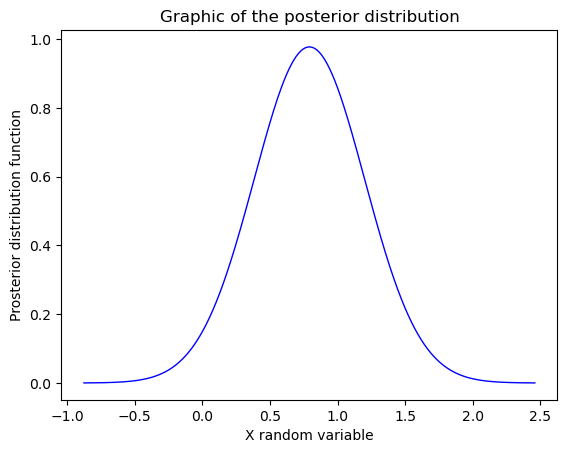

In [12]:
mean = (0.2 + 0.75) / (0.2 + 1)
std = 0.2 / (0.2 + 1)
plt.figsize=(5,10)
x = np.linspace(mean - 10 * std, mean + 10 * std, 100001)
plt.plot(x, norm.pdf(x, mean, np.sqrt(std)),
        'b-', lw=1, alpha=1)
plt.xlabel('X random variable')
plt.ylabel('Prosterior distribution function')
plt.title('Graphic of the posterior distribution')
plt.show()

Check the distribution with cumulative function

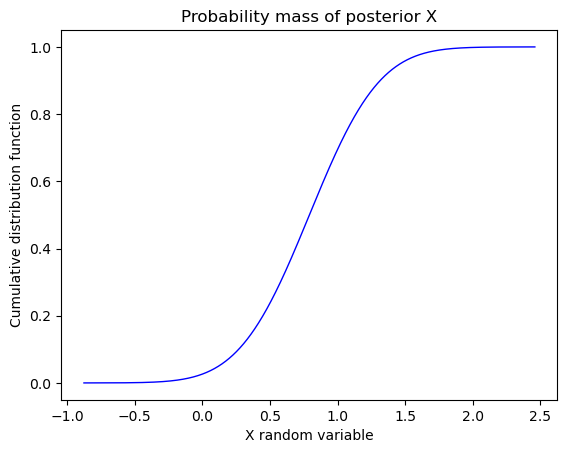

In [13]:
mean = (0.2 + 0.75) / (0.2 + 1)
std = 0.2 / (0.2 + 1)
plt.figsize=(5,10)
x = np.linspace(mean - 10 * std, mean + 10 * std, 100001)
plt.plot(x, norm.cdf(x, mean, np.sqrt(std)),
        'b-', lw=1, alpha=1)
plt.xlabel('X random variable')
plt.ylabel('Cumulative distribution function')
plt.title('Probability mass of posterior X')
plt.show()

Again plot $p(x)$:

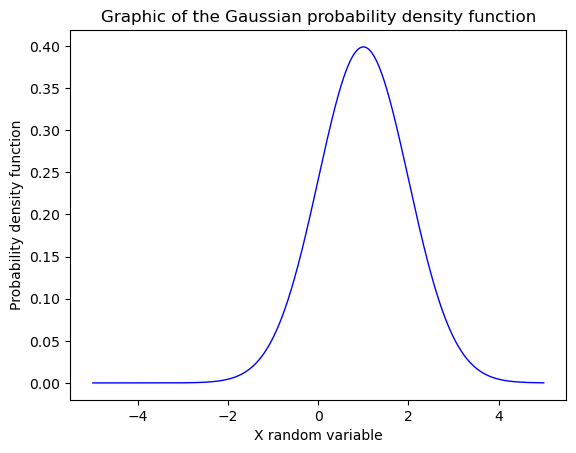

In [14]:
plt.figsize=(5,10)
x = np.linspace(-5, 5, 100001)
plt.plot(x, norm.pdf(x, 1, 1),
        'b-', lw=1, alpha=1)
plt.xlabel('X random variable')
plt.ylabel('Probability density function')
plt.title('Graphic of the Gaussian probability density function')
plt.show()

And finally, plot both graphics on the one canvas

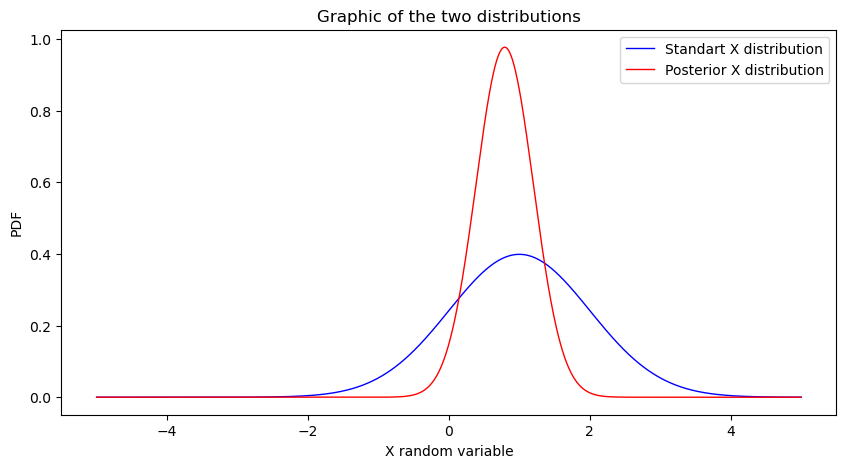

In [15]:
mean = (0.2 + 0.75) / (0.2 + 1)
std = 0.2 / (0.2 + 1)
fig, ax = plt.subplots(figsize=(10,5))
x = np.linspace(-5, 5, 100001)
plt.plot(x, norm.pdf(x, 1, 1),
        'b-', lw=1, alpha=1, label='Standart X distribution')
plt.plot(x, norm.pdf(x, mean, np.sqrt(std)),
        'r-', lw=1, alpha=1, label='Posterior X distribution')
ax.legend();
plt.xlabel('X random variable')
plt.ylabel('PDF')
plt.title('Graphic of the two distributions')
plt.show()

# Task 2: Multivariate gaussian
## Task 2.1: Visualization of multivariation gaussian distribution
Let's build plot2dcov function, which will plot visualization of 2-d gaussian with three main parameters: mean, covariance and iso-contour value k.

In [18]:
def upper_circle(x: np.float64, k: np.int64) -> np.float64:
    return np.sqrt(k**2 - (x)**2)

def lower_circle(x: np.float64, k: np.int64) -> np.float64:
    return -np.sqrt(k**2 - (x)**2)

def generate_points(k: np.int64, number_of_points: np.int64) -> Tuple[np.array, np.array]:
    x = np.linspace(-k, k, number_of_points // 2)
    upper_y = np.array([upper_circle(x_i, k) for x_i in x])
    lower_y = np.array([lower_circle(x_i, k) for x_i in x])
    tmp = np.array([x, upper_y])
    return np.array([x, upper_y]), np.array([x, lower_y])

def transform(mean: np.array, cov: np.array, upper: np.array, lower:np.array) -> Tuple[np.array, np.array]:
    center_x = mean[0]
    center_y = mean[1]
    L = scipy.linalg.cholesky(cov).T
    upper_transform = L @ upper
    lower_transform = L @ lower
    upper_transform[0,:] = upper_transform[0,:] + center_x
    upper_transform[1,:] = upper_transform[1,:] + center_y
    lower_transform[0,:] = lower_transform[0,:] + center_x
    lower_transform[1,:] = lower_transform[1,:] + center_y
    return upper_transform, lower_transform


def plot2dcov(mean: np.array, cov: np.array, k: np.int64, number_of_points: np.int64, color: str = 'blue', type='point'):
    upper, lower = generate_points(k, number_of_points)
    upper, lower = transform(mean, cov, upper, lower)
    plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_aspect('equal')
    if type == 'point':
        plt.scatter(upper[0,:], upper[1, :], color=color)
        plt.scatter(lower[0, :], lower[1, :], color=color)
    else:
        plt.plot(upper[0,:], upper[1, :], color=color)
        plt.plot(lower[0, :], lower[1, :], color=color)
    plt.show

Also, create a function which create and return ellipse by the mean, covariance matrix and k iso-contour to visualize sevarl ellipses on one plot.

In [19]:
def create2Dellipse(mean: np.array, cov: np.array, k: np.int64, number_of_points: np.int64) -> Tuple[np.array, np.array]:
    upper, lower = generate_points(k, number_of_points)
    upper, lower = transform(mean, cov, upper, lower)
    return upper, lower

<Figure size 1000x1000 with 0 Axes>

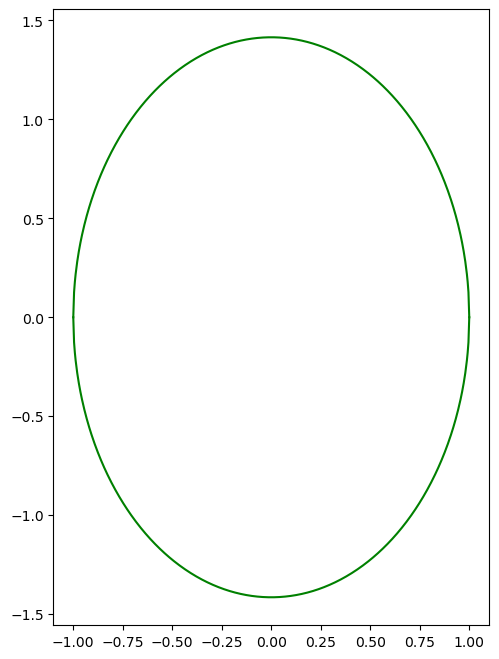

In [198]:
cov = np.array([[1, 0], [0, 2]])
mean = np.array([0, 0])
plot2dcov(mean, cov, 1, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

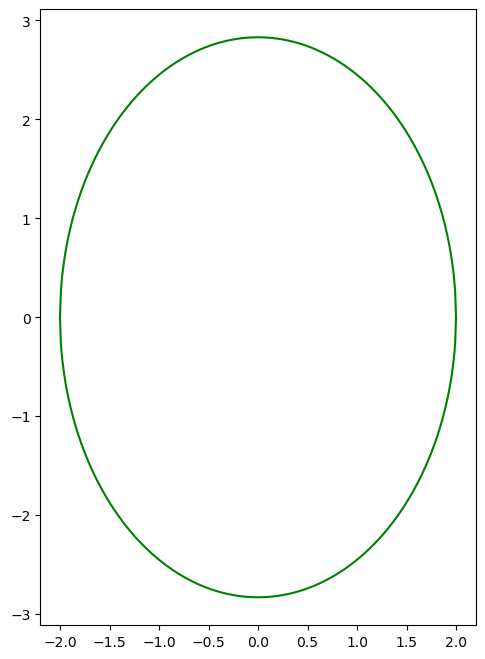

In [199]:
cov = np.array([[1, 0], [0, 2]])
mean = np.array([0, 0])
plot2dcov(mean, cov, 2, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

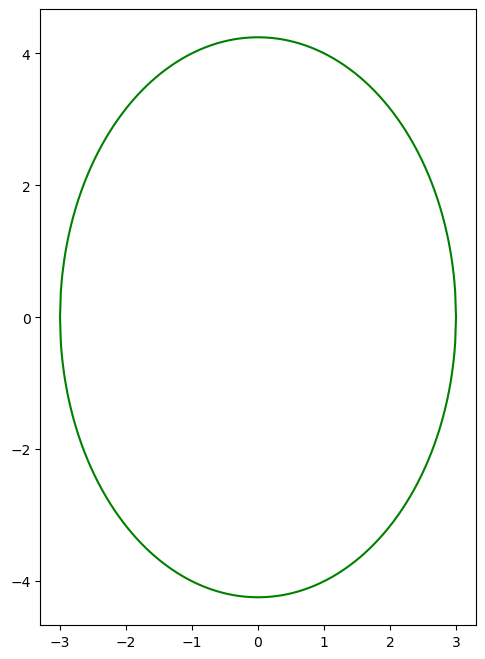

In [200]:
cov = np.array([[1, 0], [0, 2]])
mean = np.array([0, 0])
plot2dcov(mean, cov, 3, 1000, color='green', type='line')

<Figure size 1500x1500 with 0 Axes>

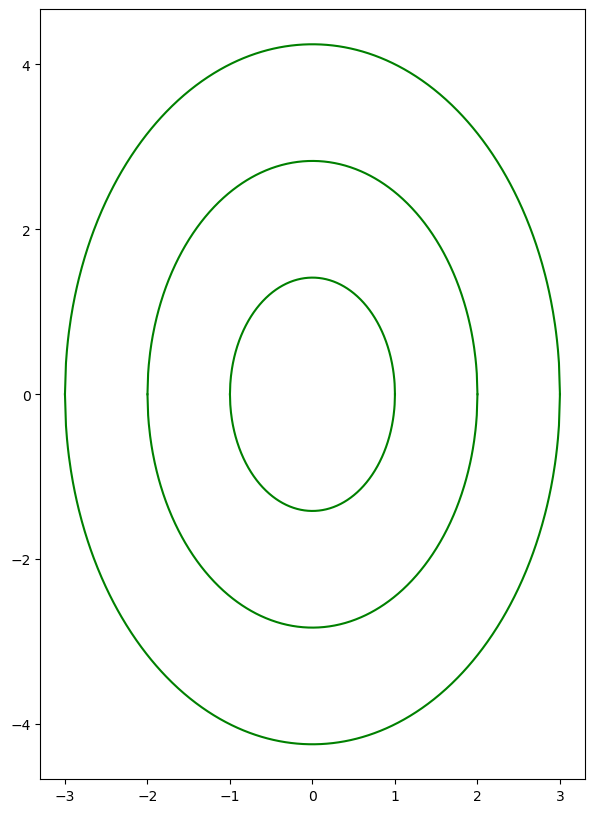

In [211]:
cov = np.array([[1, 0], [0, 2]])
mean = np.array([0, 0])
upper1, lower1 = create2Dellipse(mean, cov, 1, 1000)
upper2, lower2 = create2Dellipse(mean, cov, 2, 1000)
upper3, lower3 = create2Dellipse(mean, cov, 3, 1000)
plt.figure(figsize=(15,15))
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
plt.plot(upper1[0,:], upper1[1, :], color='green')
plt.plot(lower1[0, :], lower1[1, :], color='green')
plt.plot(upper2[0,:], upper2[1, :], color='green')
plt.plot(lower2[0, :], lower2[1, :], color='green')
plt.plot(upper3[0,:], upper3[1, :], color='green')
plt.plot(lower3[0, :], lower3[1, :], color='green')
plt.show()


<Figure size 1000x1000 with 0 Axes>

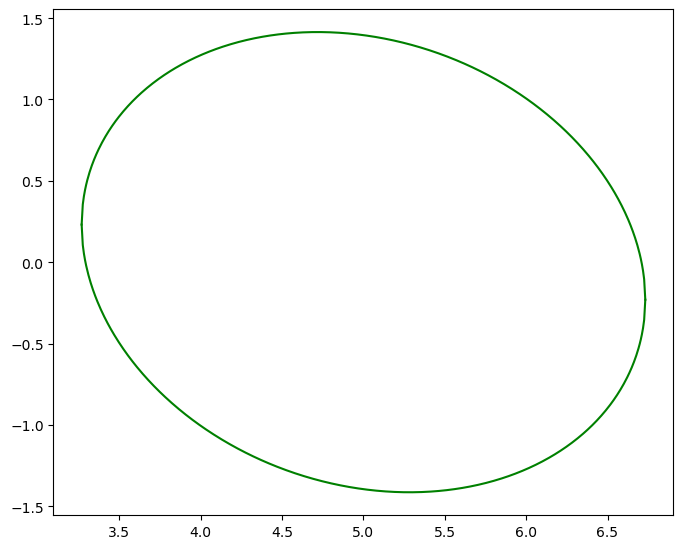

In [184]:
cov = np.array([[3, -0.4], [-0.4, 2]])
mean = np.array([5, 0])
plot2dcov(mean, cov, 1, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

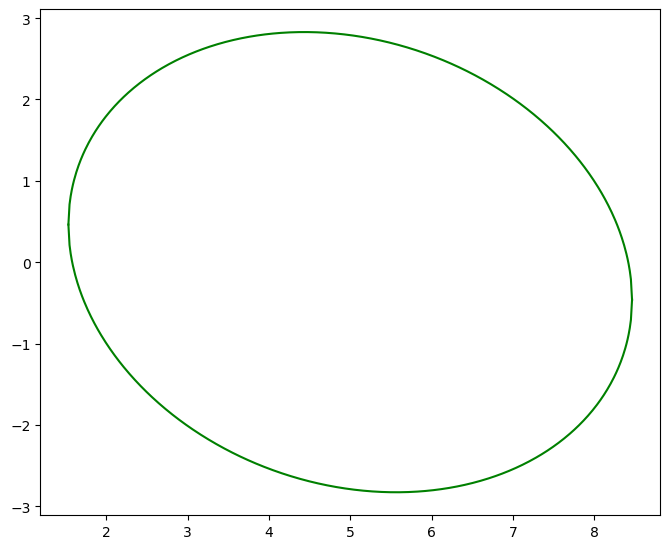

In [185]:
cov = np.array([[3, -0.4], [-0.4, 2]])
mean = np.array([5, 0])
plot2dcov(mean, cov, 2, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

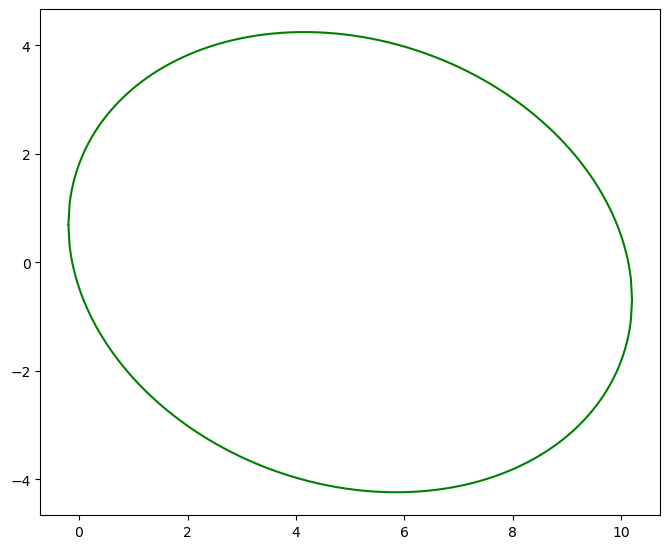

In [186]:
cov = np.array([[3, -0.4], [-0.4, 2]])
mean = np.array([5, 0])
plot2dcov(mean, cov, 3, 1000, color='green', type='line')

<Figure size 1500x1500 with 0 Axes>

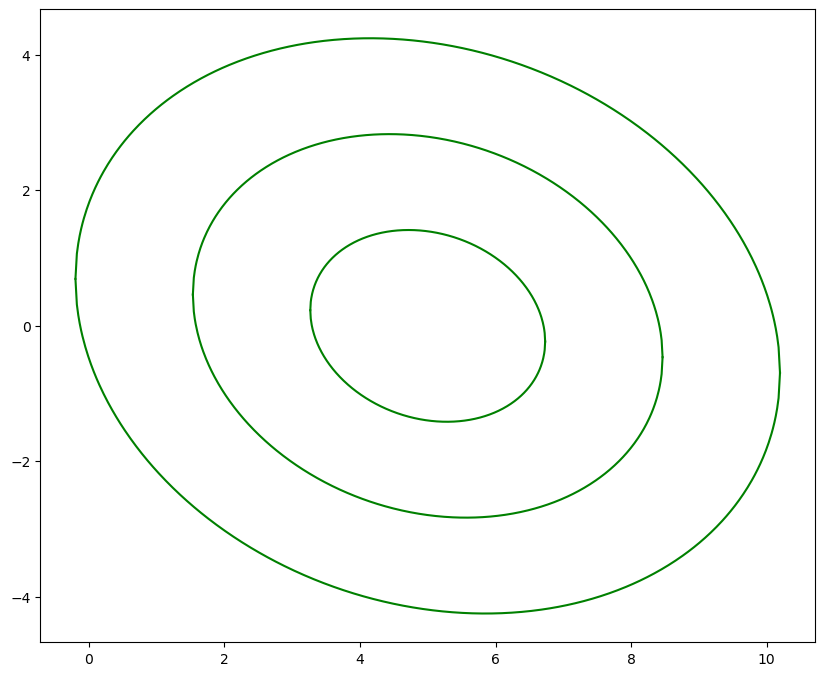

In [212]:
cov = np.array([[3, -0.4], [-0.4, 2]])
mean = np.array([5, 0])
upper1, lower1 = create2Dellipse(mean, cov, 1, 1000)
upper2, lower2 = create2Dellipse(mean, cov, 2, 1000)
upper3, lower3 = create2Dellipse(mean, cov, 3, 1000)
plt.figure(figsize=(15,15))
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
plt.plot(upper1[0,:], upper1[1, :], color='green')
plt.plot(lower1[0, :], lower1[1, :], color='green')
plt.plot(upper2[0,:], upper2[1, :], color='green')
plt.plot(lower2[0, :], lower2[1, :], color='green')
plt.plot(upper3[0,:], upper3[1, :], color='green')
plt.plot(lower3[0, :], lower3[1, :], color='green')
plt.show()

<Figure size 1000x1000 with 0 Axes>

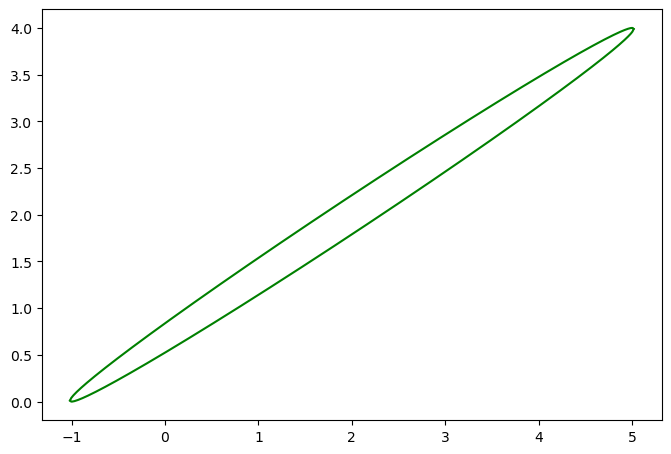

In [183]:
cov = np.array([[9.1, 6], [6, 4]])
mean = np.array([2, 2])
plot2dcov(mean, cov, 1, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

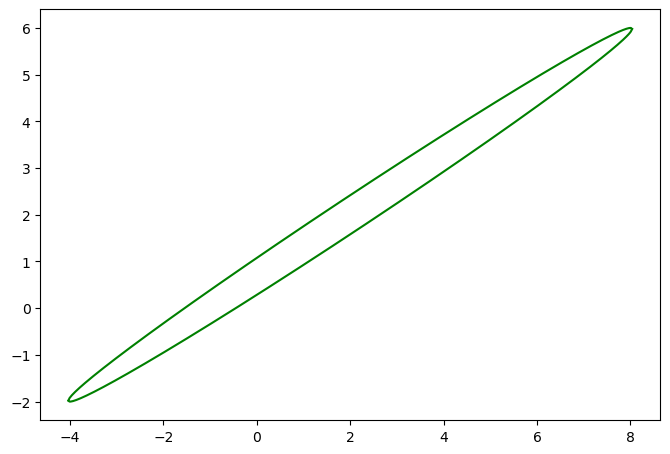

In [180]:
cov = np.array([[9.1, 6], [6, 4]])
mean = np.array([2, 2])
plot2dcov(mean, cov, 2, 1000, color='green', type='line')

<Figure size 1000x1000 with 0 Axes>

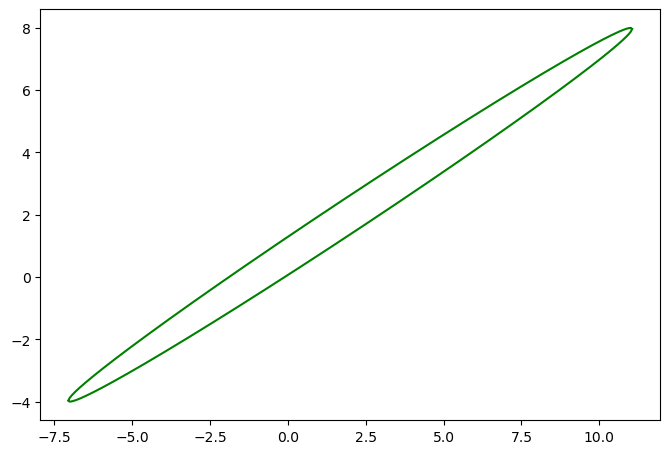

In [181]:
cov = np.array([[9.1, 6], [6, 4]])
mean = np.array([2, 2])
plot2dcov(mean, cov, 3, 1000, color='green', type='line')

<Figure size 1500x1500 with 0 Axes>

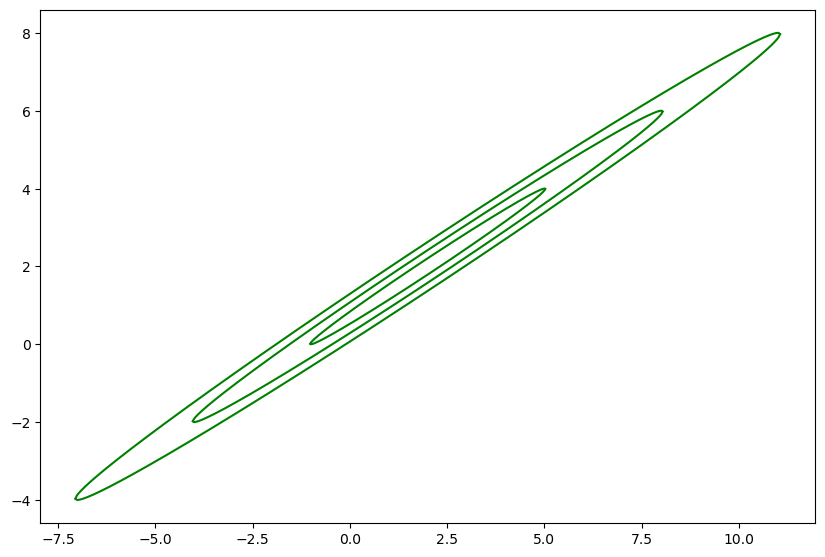

In [213]:
cov = np.array([[9.1, 6], [6, 4]])
mean = np.array([2, 2])
upper1, lower1 = create2Dellipse(mean, cov, 1, 1000)
upper2, lower2 = create2Dellipse(mean, cov, 2, 1000)
upper3, lower3 = create2Dellipse(mean, cov, 3, 1000)
plt.figure(figsize=(15,15))
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
plt.plot(upper1[0,:], upper1[1, :], color='green')
plt.plot(lower1[0, :], lower1[1, :], color='green')
plt.plot(upper2[0,:], upper2[1, :], color='green')
plt.plot(lower2[0, :], lower2[1, :], color='green')
plt.plot(upper3[0,:], upper3[1, :], color='green')
plt.plot(lower3[0, :], lower3[1, :], color='green')
plt.show()

Comments: We have build several different iso-contours. We can see that mean is the center of ellipse, when the covariance describes the affine transformation. Also, we can see, when we build several iso-contours on one plot that with increasing k of iso-contour, ellipse remains similar but increase in size.

## Task 2.2 Sample equation
Let's write an equations of sample mean and sample covariance of a set of points in vector form.

1. First of all, sample points from normal distribution $\mathcal{N}(0, I)$. This we can do with sampling n standart gaussian: <br>
$x =\begin{bmatrix}\mathcal{N}(0,1) \\ \mathcal{N}(0,1) \\ ... \\ \mathcal{N}(0,1) \end{bmatrix}$.
2. Next, present multivariable diatribution as $y = Ax + b$. After that, we can write $y \sim \mathcal{N}(\mu_y, \Sigma_y)$.
3. Using the linear covariance propogation, we can write $y \sim \mathcal{N}(A\mu_x + b, A\Sigma_x A^T)$.
4. $\mu_y = A\mu_x + b$. Using the fact, that $\mu_x = 0$, than we have: $\mu_y = b$
5. $\Sigma_y = A\Sigma_x A^T$, where $\Sigma_x = I$. So, $\Sigma_y = AA^T$. We can get $\Sigma_y$ by Cholesky factorization.
6. After that, we can transform each sample $x \sim \mathcal{N}(0, I)$ with affine transformation $y = Ax + b$, which transform our pdf to multivariance $y \sim \mathcal{N}(\mu_y, \Sigma_y)$

## Task 2.3: Multivariable normal distribution samples
Let's drow several samples from multivariable dustribution and build their iso-contour.

Create function which transfer $\mathcal{N}(0, I)$ samples to multivariance distribution with mean and covariance.

In [233]:
def generate_multivariance(mean: np.array, cov: np.array, number_of_points: np.int64) -> np.array:
    samples = np.random.randn(2, number_of_points)
    A = scipy.linalg.cholesky(cov).T
    y = A @ samples
    y[0,:] = y[0,:] + mean[0]
    y[1,:] = y[1,:] + mean[1]
    return y

Next, generate several samples with number of points 200, 500, 1000, 5000, 10000.

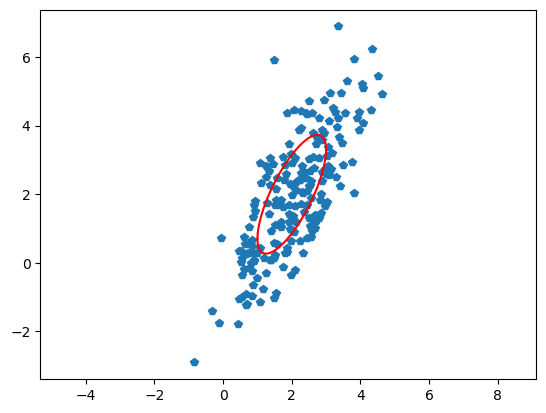

In [242]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])
y = generate_multivariance(mean, cov, 200)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(y[0,:], y[1,:], 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

Mean is equal to:  [2.05621945 1.93385596]
Covariance is equal to:  [[1.05181893 1.38731422]
 [1.38731422 3.16860053]]


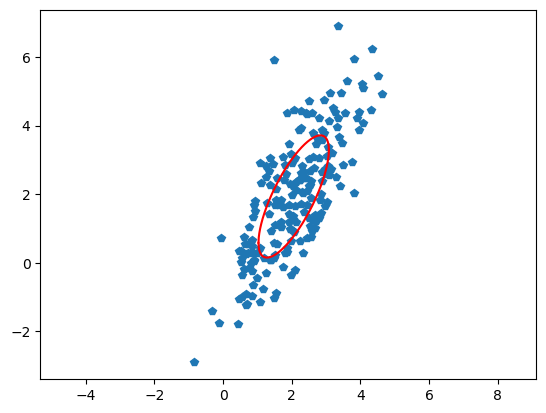

In [243]:
mean = y.mean(axis=1)
cov = np.cov(y)
print('Mean is equal to: ', mean)
print('Covariance is equal to: ', cov)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(y[0,:], y[1,:], 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

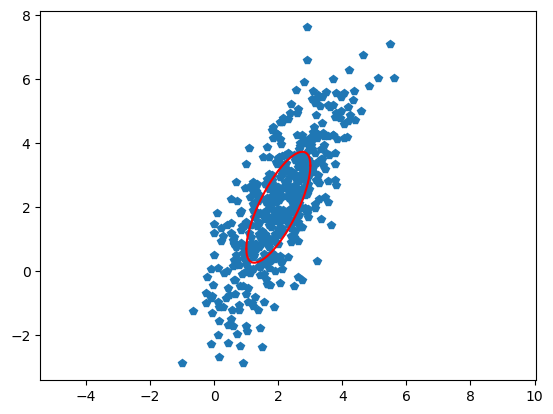

In [244]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])
y = generate_multivariance(mean, cov, 500)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(y[0,:], y[1,:], 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

Mean is equal to:  [2.04948257 2.07979176]
Covariance is equal to:  [[1.08824923 1.44885507]
 [1.44885507 3.37670952]]


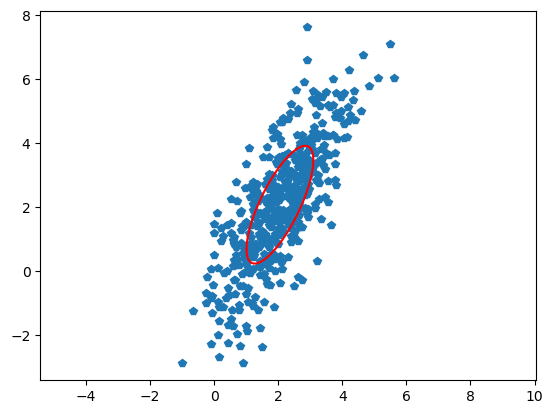

In [245]:
mean = y.mean(axis=1)
cov = np.cov(y)
print('Mean is equal to: ', mean)
print('Covariance is equal to: ', cov)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(y[0,:], y[1,:], 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

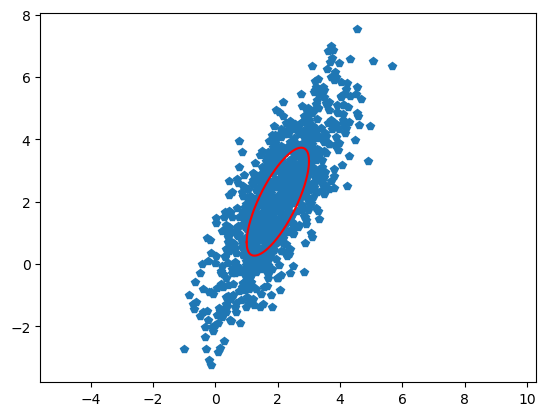

In [246]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])
y = generate_multivariance(mean, cov, 1000)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(y[0,:], y[1,:], 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

Mean is equal to:  [1.98217773 2.053928  ]
Covariance is equal to:  [[1.09064756 1.43856664]
 [1.43856664 3.17415266]]


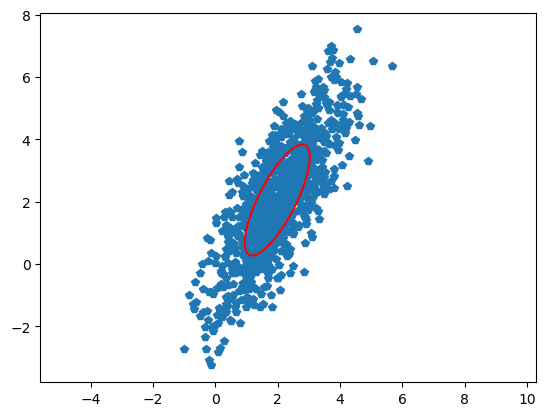

In [247]:
mean = y.mean(axis=1)
cov = np.cov(y)
print('Mean is equal to: ', mean)
print('Covariance is equal to: ', cov)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(y[0,:], y[1,:], 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

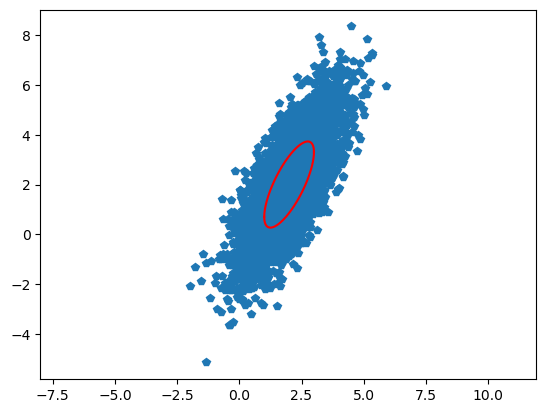

In [248]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])
y = generate_multivariance(mean, cov, 5000)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(y[0,:], y[1,:], 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

Mean is equal to:  [2.00222788 2.00289047]
Covariance is equal to:  [[0.99271156 1.32003513]
 [1.32003513 3.05684664]]


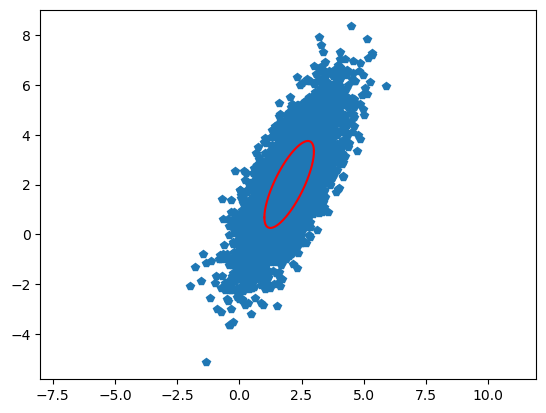

In [249]:
mean = y.mean(axis=1)
cov = np.cov(y)
print('Mean is equal to: ', mean)
print('Covariance is equal to: ', cov)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(y[0,:], y[1,:], 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

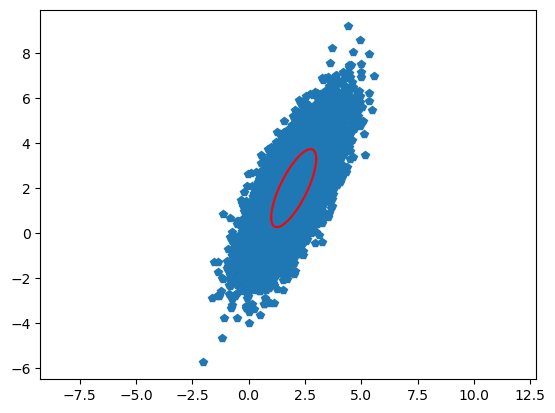

In [250]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])
y = generate_multivariance(mean, cov, 10000)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(y[0,:], y[1,:], 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

Mean is equal to:  [1.98988192 1.99330549]
Covariance is equal to:  [[0.98359636 1.26898268]
 [1.26898268 2.94633965]]


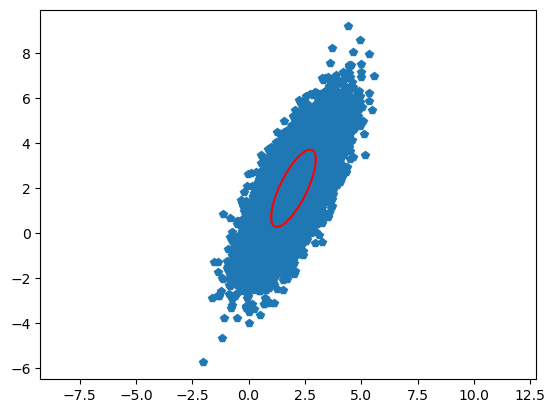

In [251]:
mean = y.mean(axis=1)
cov = np.cov(y)
print('Mean is equal to: ', mean)
print('Covariance is equal to: ', cov)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(y[0,:], y[1,:], 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

Comment: We can see the increasing number of points distribution becomes more gaussian and it parameters converge to the mean and covariance which we are given to the generator. 

Also, we can do the same things with standart function from numpy - np.random.multivariate_normal and see results.

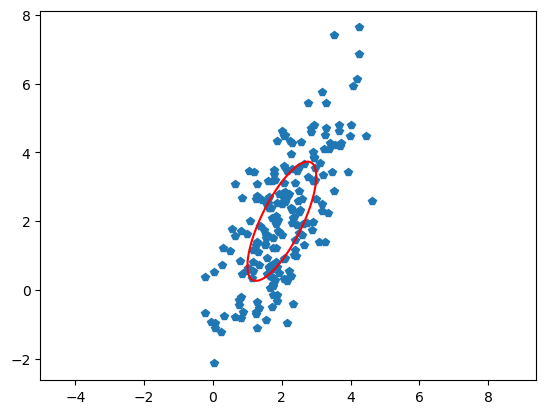

In [252]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])
x, y = np.random.multivariate_normal(mean, cov, 200).T
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(x, y, 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

Mean is equal to:  [2.03275086 2.09315275]
Covariance is equal to:  [[0.94503488 1.22399768]
 [1.22399768 3.22839694]]


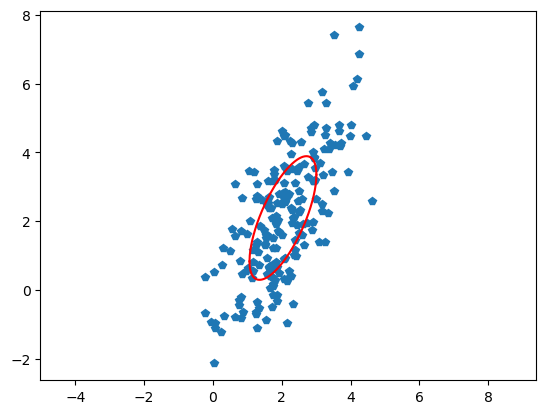

In [253]:
mean = np.array([np.mean(x), np.mean(y)])
cov = np.cov(np.array([x, y]))
print('Mean is equal to: ', mean)
print('Covariance is equal to: ', cov)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(x, y, 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

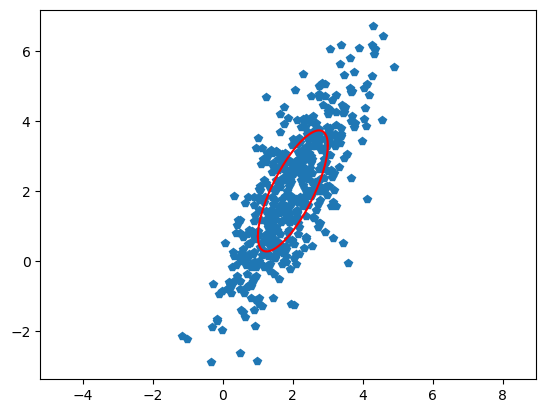

In [254]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])
x, y = np.random.multivariate_normal(mean, cov, 500).T
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(x, y, 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

Mean is equal to:  [1.95733083 1.91839032]
Covariance is equal to:  [[0.97969499 1.29616884]
 [1.29616884 3.02304857]]


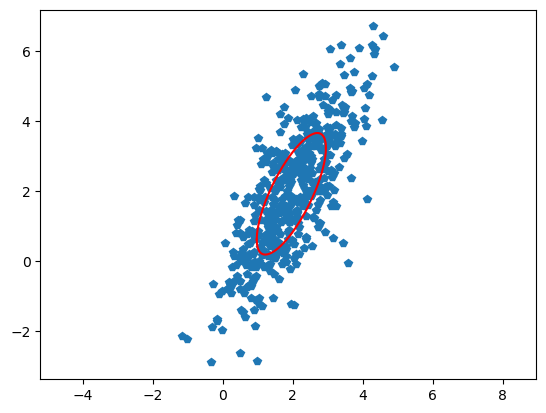

In [255]:
mean = np.array([np.mean(x), np.mean(y)])
cov = np.cov(np.array([x, y]))
print('Mean is equal to: ', mean)
print('Covariance is equal to: ', cov)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(x, y, 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

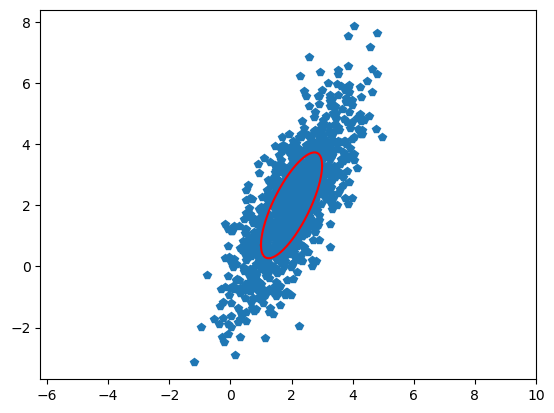

In [256]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])
x, y = np.random.multivariate_normal(mean, cov, 1000).T
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(x, y, 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

Mean is equal to:  [2.04978379 2.05864354]
Covariance is equal to:  [[1.00308457 1.31999749]
 [1.31999749 3.04890918]]


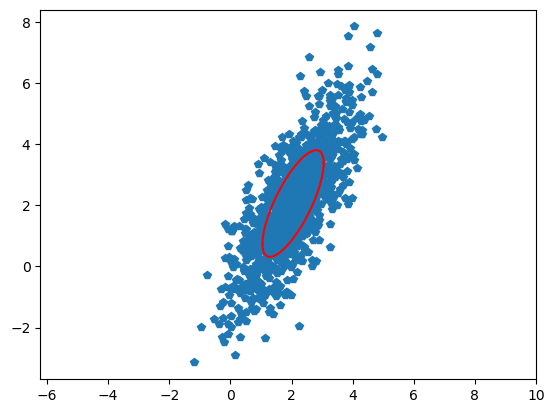

In [257]:
mean = np.array([np.mean(x), np.mean(y)])
cov = np.cov(np.array([x, y]))
print('Mean is equal to: ', mean)
print('Covariance is equal to: ', cov)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(x, y, 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

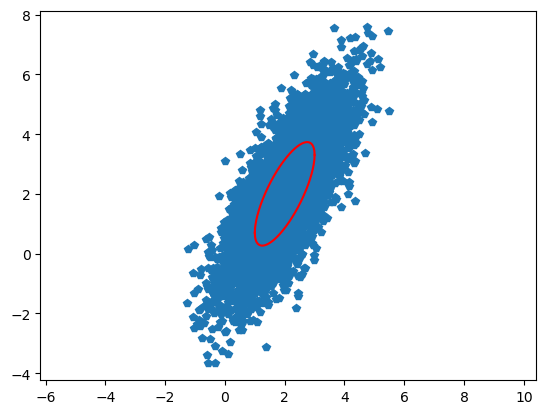

In [258]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])
x, y = np.random.multivariate_normal(mean, cov, 5000).T
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(x, y, 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

Mean is equal to:  [2.00208133 1.98900532]
Covariance is equal to:  [[0.97850868 1.245042  ]
 [1.245042   2.90009139]]


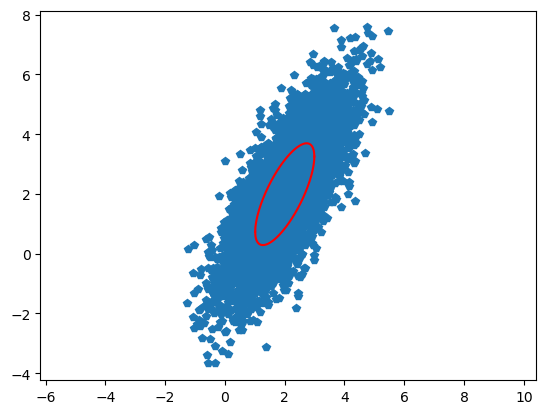

In [259]:
mean = np.array([np.mean(x), np.mean(y)])
cov = np.cov(np.array([x, y]))
print('Mean is equal to: ', mean)
print('Covariance is equal to: ', cov)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(x, y, 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

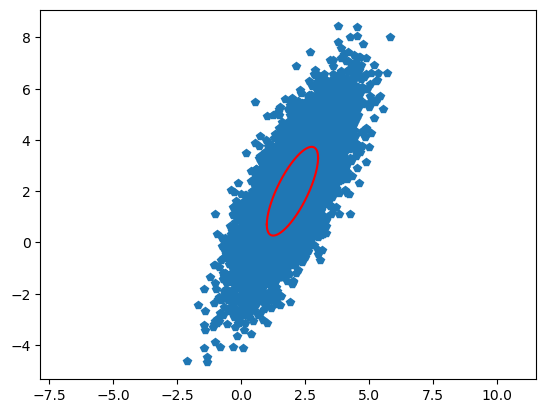

In [262]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])
x, y = np.random.multivariate_normal(mean, cov, 10000).T
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(x, y, 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

Mean is equal to:  [1.99540236 1.99750345]
Covariance is equal to:  [[1.01163235 1.3187286 ]
 [1.3187286  3.05647595]]


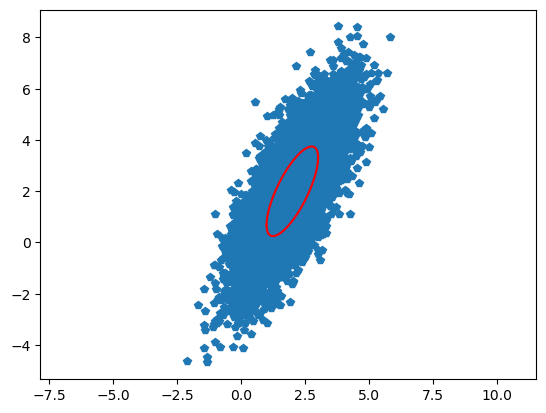

In [263]:
mean = np.array([np.mean(x), np.mean(y)])
cov = np.cov(np.array([x, y]))
print('Mean is equal to: ', mean)
print('Covariance is equal to: ', cov)
upper, lower = create2Dellipse(mean, cov, 1, 1000)
plt.plot(x, y, 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

We get pretty same results as with handmade generator and affine transformation.

Also, we can check 3-sigma rule. Let's build 3-sigma iso-contour.

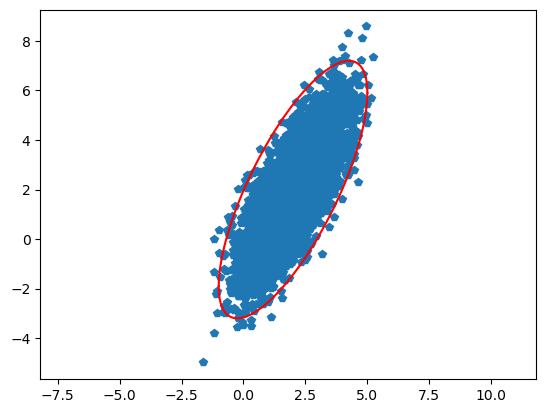

In [264]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])
x, y = np.random.multivariate_normal(mean, cov, 5000).T
upper, lower = create2Dellipse(mean, cov, 3, 1000)
plt.plot(x, y, 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.show()

We can see that 3-sigma iso-contour covers the majority of points in distribution.

# Task 3: Covariance propogation
We have a holonomic platform, moving as a free point without restriction: $ \begin{bmatrix} x \\ y \end{bmatrix}_t = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ x_y \end{bmatrix}_{t} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_t$, where $u = \begin{bmatrix} v_x & v_y \end{bmatrix}^T$ is the velocities, which controls the platform. $\begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix} \sim \mathcal{N}(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix})$ - uncertainty of command execution. $\Delta t$ is equal to $0.5$.
## Task 3.1: Single propogation of holonomic platform
Let's describe the mean and covariance after single propogation of holonomic platform.

Mean: $\mathbb{E}(\begin{bmatrix} x \\ y \end{bmatrix}_t) = \mathbb{E}(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ x_y \end{bmatrix}_{t} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_t) = \mathbb{E}(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}_{t-1}) + \mathbb{E}(\begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ x_y \end{bmatrix}_{t}) + \mathbb{E}(\begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_t) = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \mathbb{E}(\begin{bmatrix} x \\ y \end{bmatrix}_{t-1}) + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ x_y \end{bmatrix}_{t} + \begin{bmatrix} 0 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} \mathbb{E}(x) \\ \mathbb{E}(y) \end{bmatrix}_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ x_y \end{bmatrix}_{t}$ <br>
Mean: $\mathbb{E}(\begin{bmatrix} x \\ y \end{bmatrix}_t) = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} \mathbb{E}(x) \\ \mathbb{E}(y) \end{bmatrix}_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ x_y \end{bmatrix}_{t} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} \mu_x \\ \mu_y \end{bmatrix}_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ x_y \end{bmatrix}_{t} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \mathbb{E}(\begin{bmatrix} x \\ y \end{bmatrix}_{t-1}) + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ x_y \end{bmatrix}_{t} = \begin{bmatrix} \mu_x + \Delta t v_x \\ \mu_y + \Delta t v_y \end{bmatrix}$ <br>
Covarianse:  $cov(\begin{bmatrix} x \\ y \end{bmatrix}_t) = \mathbb{E}((\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ x_y \end{bmatrix}_{t} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix} - \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \mathbb{E}(\begin{bmatrix} x \\ y \end{bmatrix}_{t-1}) + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ x_y \end{bmatrix}_{t} + \begin{bmatrix} 0 \\ 0 \end{bmatrix})(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ x_y \end{bmatrix}_{t} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix} - \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \mathbb{E}(\begin{bmatrix} x \\ y \end{bmatrix}_{t-1}) + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ x_y \end{bmatrix}_{t} + \begin{bmatrix} 0 \\ 0 \end{bmatrix})^T) = (\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}(x + \eta - \mu_x - \mu_{\eta})(x + \eta - \mu_x - \mu_{\eta})^T\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}) = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}(\Sigma(x + \eta))\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}(\Sigma_x + \Sigma_\eta)\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

Using the data from problem 3C we can get:
Mean: $\mathbb{E}(\begin{bmatrix} x \\ y \end{bmatrix}_{0.5}) = \begin{bmatrix} \Delta t v_x \\ \Delta t v_y \end{bmatrix}$ <br>
Covariance: $cov(\begin{bmatrix} x \\ y \end{bmatrix}_{0.5}) = \begin{bmatrix} 0.2 & 0 \\ 0 & 0.2 \end{bmatrix}$

## Task 3.2: Itterative usage
We can use this result itteratively. We know the start position of the platform, so, after that we can calculate mean of the podition and it covariance using the calculation of previous position by the formula: <br>
$\mathbb{E}(X_t) = I \mathbb{E}(X_{t-1}) + I \Delta t u$ <br>
$cov(X_{t}) = I(\Sigma_x + \Sigma_\eta)I$<br>
Calculation position by position in discrete time we can get position of platform in any discrete moment itteratively.

## Task 3.3: Holonomic platform propogation state
Let's draw propogation state pdf for holonomic platform in moments $t =0..5$. The control sequence is constant and equal $u = \begin{bmatrix}3 & 0 \end{bmatrix}$. Start position is $\begin{bmatrix} x \\ y \end{bmatrix}_0 \sim \mathcal{N}(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix})$

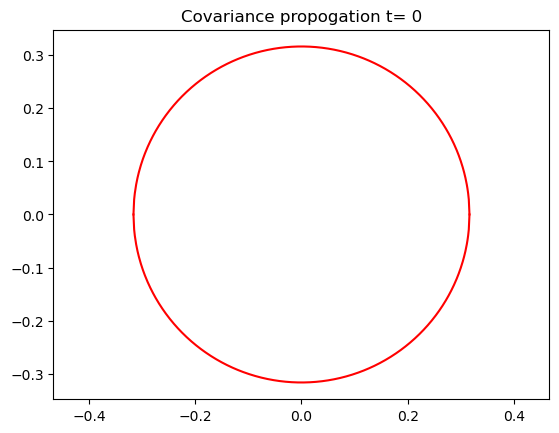

In [20]:
def new_mean(previous_mean: np.array, velocity: np.array, noise_mean: np.array) -> np.array:
    return previous_mean + 0.5 * velocity + noise_mean

def new_cov(previous_cov: np.array, noise_cov: np.array) -> np.array:
    return previous_cov + noise_cov

mean0 = np.array([0, 0])
cov0 = np.array([[0.1, 0], [0, 0.1]])
velocity = np.array([3, 0])
noise_mean = np.array([0, 0])
noise_cov = np.array([[0.1, 0], [0, 0.1]])

upper, lower = create2Dellipse(mean0, cov0, 1, 1000)
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.title('Covariance propogation t= 0')
plt.show()


[[0.2 0. ]
 [0.  0.2]]
[[0.3 0. ]
 [0.  0.3]]
[[0.4 0. ]
 [0.  0.4]]
[[0.5 0. ]
 [0.  0.5]]
[[0.6 0. ]
 [0.  0.6]]
[[0.7 0. ]
 [0.  0.7]]
[[0.8 0. ]
 [0.  0.8]]
[[0.9 0. ]
 [0.  0.9]]
[[1. 0.]
 [0. 1.]]
[[1.1 0. ]
 [0.  1.1]]
[[1.2 0. ]
 [0.  1.2]]


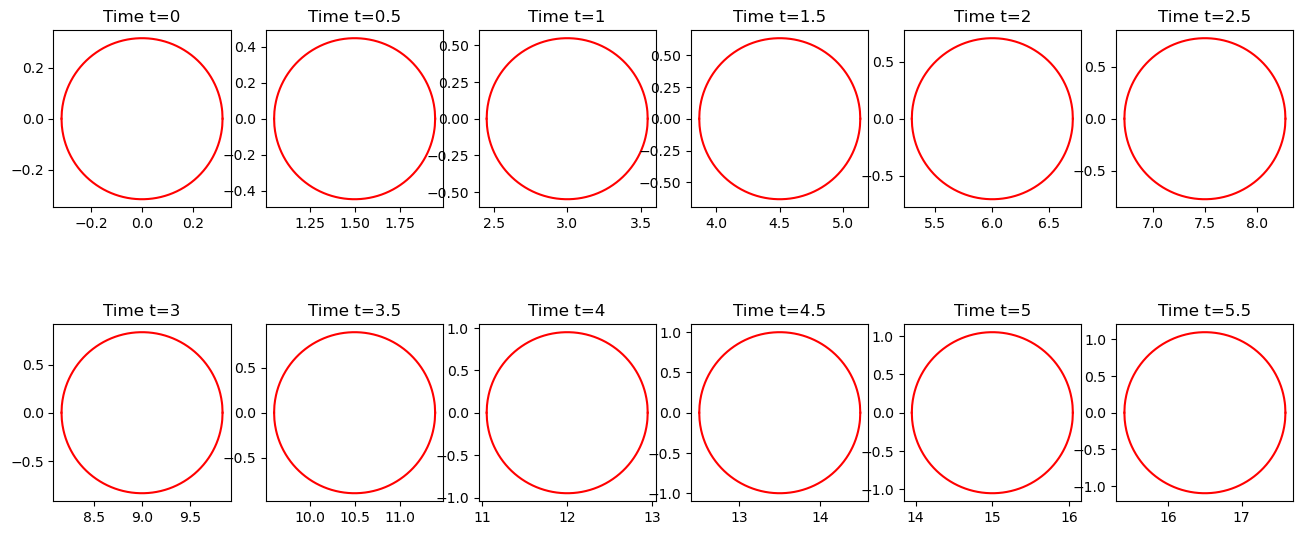

In [23]:
t_values = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
fig, axes = plt.subplots(ncols=(len(t_values))// 2,
                         nrows=2, figsize=(16, 7))

prev_mean = mean0
prev_cov = cov0
for p, ax in zip(t_values, axes.flat):
    if p == 0:
        upper, lower = create2Dellipse(mean0, cov0, 1, 1000)
    else:
        mean = new_mean(prev_mean, velocity, noise_mean)
        cov = new_cov(prev_cov, noise_cov)
        upper, lower = create2Dellipse(mean, cov, 1, 1000)
        prev_mean = mean
        prev_cov = cov
    ax.plot(upper[0,:], upper[1, :], color='red')
    ax.plot(lower[0, :], lower[1, :], color='red')
    ax.set_aspect('equal')
    ax.set_title(f'Time t={p}')
plt.show()

## Task 3.4: Platform malfunctioning
Let's calculate mean and covariance for this system <br>
$\mathbb{E}\begin{bmatrix} x \\ y \end{bmatrix}_t = \begin{bmatrix} 1 & 0.3 \\ 0 & 1 \end{bmatrix}\mathbb{E}(\begin{bmatrix} x \\ y \end{bmatrix}_{t-1}) + I \Delta t u$ <br>
$cov(\begin{bmatrix} x \\ y \end{bmatrix}_t) = \begin{bmatrix} 1 & 0.3 \\ 0 & 1 \end{bmatrix} \Sigma_x \begin{bmatrix} 1 & 0.3 \\ 0 & 1 \end{bmatrix}^T + \Sigma_\eta$

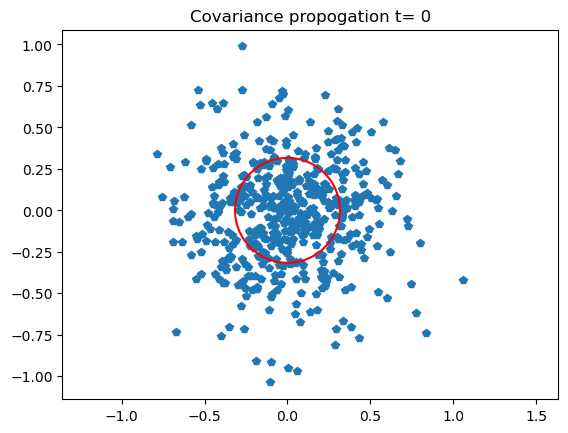

In [284]:
def new_mean1(previous_mean: np.array, velocity: np.array, noise_mean: np.array) -> np.array:
    return np.array([[1, 0.3], [0, 1]]) @ previous_mean + 0.5 * velocity + noise_mean

def new_cov1(previous_cov: np.array, noise_cov: np.array) -> np.array:
    return np.array([[1, 0.3], [0, 1]]) @ previous_cov @ np.array([[1, 0.3], [0, 1]]).T + noise_cov

mean0 = np.array([0, 0])
cov0 = np.array([[0.1, 0], [0, 0.1]])
velocity = np.array([3, 0])
noise_mean = np.array([0, 0])
noise_cov = np.array([[0.1, 0], [0, 0.1]])

upper, lower = create2Dellipse(mean0, cov0, 1, 1000)
x, y = np.random.multivariate_normal(mean0, cov0, 500).T
plt.plot(x, y, 'p')
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.title('Covariance propogation t= 0')
plt.show()

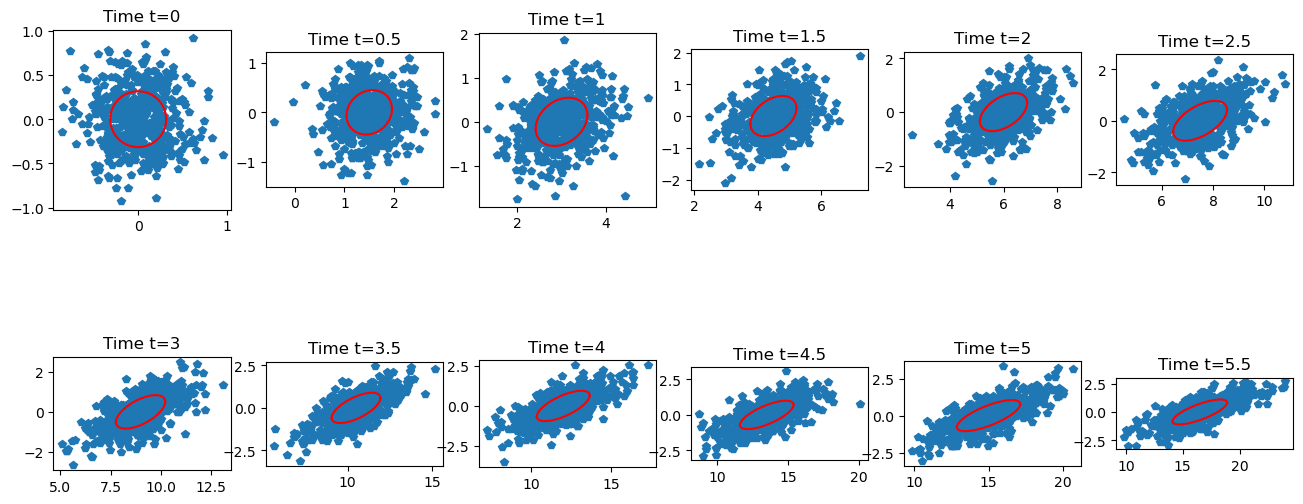

In [286]:
t_values = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
fig, axes = plt.subplots(ncols=(len(t_values))// 2,
                         nrows=2, figsize=(16, 7))

prev_mean = mean0
prev_cov = cov0
for p, ax in zip(t_values, axes.flat):
    if p == 0:
        upper, lower = create2Dellipse(mean0, cov0, 1, 1000)
        x, y = np.random.multivariate_normal(mean0, cov0, 500).T
    else:
        mean = new_mean1(prev_mean, velocity, noise_mean)
        cov = new_cov1(prev_cov, noise_cov)
        upper, lower = create2Dellipse(mean, cov, 1, 1000)
        x, y = np.random.multivariate_normal(mean, cov, 500).T
        prev_mean = mean
        prev_cov = cov
    ax.set_aspect('equal')
    ax.plot(x, y, 'p')
    ax.plot(upper[0,:], upper[1, :], color='red')
    ax.plot(lower[0, :], lower[1, :], color='red')
    ax.set_title(f'Time t={p}')
plt.show()

## Task 3.5: Non-holonomic platform
Equation of the platform is: $\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_t = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ \theta \end{bmatrix}_{t-1} + \begin{bmatrix}cos(\theta)\Delta t & 0 \\ sin(\theta) \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} u \\ \omega\end{bmatrix} + \begin{bmatrix} \eta_x \\ \eta_y \\ \eta_{\theta} \end{bmatrix}_t$, where $\begin{bmatrix} \eta_x \\ \eta_y \\ \eta_{\theta} \end{bmatrix}_t = \mathcal{N}(\begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.2 & 0 & 0 \\ 0 & 0.2 & 0 \\ 0 & 0 & 0.2 \end{bmatrix})$, start position is $\begin{bmatrix} x \\ y \\ \theta \end{bmatrix} = \mathcal{N}(\begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.1 & 0 & 0 \\ 0 & 0.1 & 0 \\ 0 & 0 & 0.5 \end{bmatrix})$ <br>
Let's build covariance propogation

$g(x_{t-1}, u_{t-1}, 0) = \begin{bmatrix}x_{t-1} + \Delta t v_t cos(\theta_{t-1}) \\ y_{t-1} + \Delta t v_t sin(\theta_{t-1}) \\ \theta_{t-1} + \Delta t \omega_t \end{bmatrix}$

$x_t \sim \mathcal{N}(g(\mu_{t-1}, u_t, 0), G_t\Sigma G_t^T + R)$, where $G_t = \begin{bmatrix} 1 & 0 & -sin(\theta_{t-1})\Delta t v_t \\ 0 & 1 & cos(\theta_{t-1})\Delta t v_t \\ 0 & 0 & 1\end{bmatrix}$

In [308]:
def calculate_jacobian(theta: np.float64, v: np.float64) -> np.array:
    return np.array([[1, 0, -np.sin(theta) * 0.5 * v], [0, 1, np.cos(theta) * 0.5 * v], [0, 0, 1]])

def calculate_mean(coord: np.array, control: np.array) -> np.array:
    return np.array([[coord[0] + 0.5 * control[0] * np.cos(coord[2])], [coord[1] + 0.5 * control[0] * np.sin(coord[2])], coord[2] + 0.5 * control[1]])

def calculate_cov(cov: np.array, noise: np.array, coord: np.array, control: np.array) -> np.array:
    return calculate_jacobian(coord[2], control[0]) @ cov @ calculate_jacobian(coord[2], control[0]).T + noise



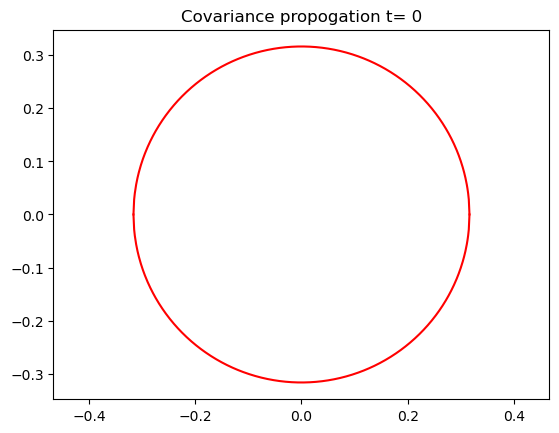

In [309]:
mean = np.array([0, 0, 0])
cov = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])
control = np.array([3, 1.5])
noise = np.array([[0.2, 0, 0], [0, 0.2, 0], [0, 0, 0.1]])

upper, lower = create2Dellipse(mean[0:2], cov[0:2,0:2], 1, 1000)
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.title('Covariance propogation t= 0')
plt.show()

/var/folders/_3/5n1k89jd143c_0ppj1d2_f2m0000gn/T/ipykernel_23769/2975923210.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([[coord[0] + 0.5 * control[0] * np.cos(coord[2])], [coord[1] + 0.5 * control[0] * np.sin(coord[2])], coord[2] + 0.5 * control[1]])


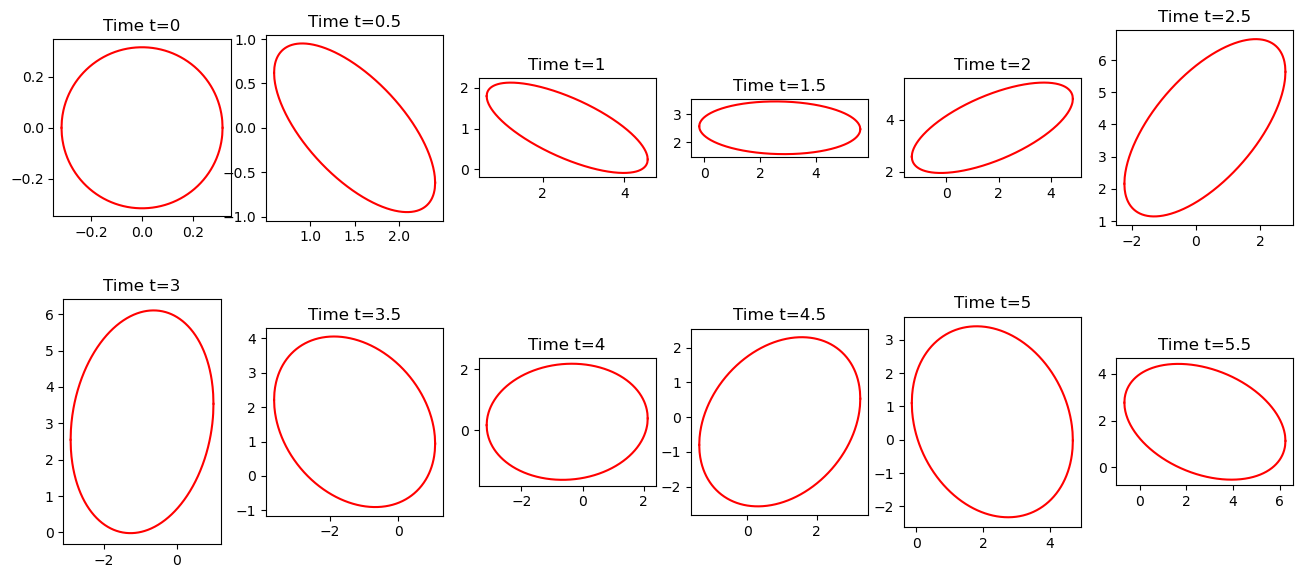

In [310]:
t_values = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
fig, axes = plt.subplots(ncols=(len(t_values))// 2,
                         nrows=2, figsize=(16, 7))

prev_mean = mean
prev_cov = cov
for p, ax in zip(t_values, axes.flat):
    if p == 0:
        upper, lower = create2Dellipse(mean[0:2], cov[0:2,0:2], 1, 1000)
    else:
        mean = calculate_mean(mean, control)
        cov = calculate_cov(cov, noise, mean, control)
        upper, lower = create2Dellipse(mean[0:2], cov[0:2,0:2], 1, 1000)
        prev_mean = mean
        prev_cov = cov
    ax.plot(upper[0,:], upper[1, :], color='red')
    ax.plot(lower[0, :], lower[1, :], color='red')
    ax.set_aspect('equal')
    ax.set_title(f'Time t={p}')
plt.show()

## Task 3.6: Non-holonomic platform with noise in action space
Equation of the platform is: $\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_t = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ \theta \end{bmatrix}_{t-1} + \begin{bmatrix}cos(\theta)\Delta t & 0 \\ sin(\theta) \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} u + \eta_u \\ \omega + \eta_\omega\end{bmatrix} $, where $\begin{bmatrix} \eta_u \\ \eta_\omega \end{bmatrix}_t = \mathcal{N}(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & 0  \\ 0 & 0.1 \end{bmatrix})$, start position is $\begin{bmatrix} x \\ y \\ \theta \end{bmatrix} = \mathcal{N}(\begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.1 & 0 & 0 \\ 0 & 0.1 & 0 \\ 0 & 0 & 0.5 \end{bmatrix})$ <br>
Let's build covariance propogation

$g(x_{t-1}, u_{t-1}, 0) = \begin{bmatrix}x_{t-1} + \Delta t v_t cos(\theta_{t-1}) \\ y_{t-1} + \Delta t v_t sin(\theta_{t-1}) \\ \theta_{t-1} + \Delta t \omega_t \end{bmatrix}$ <br>

$x_t \sim \mathcal{N}(g(\mu_{t-1}, u_t, 0), G_t\Sigma G_t^T + V_tMV_t^T)$, where $G_t = \begin{bmatrix} 1 & 0 & -sin(\theta_{t-1})\Delta t v_t \\ 0 & 1 & cos(\theta_{t-1})\Delta t v_t \\ 0 & 0 & 1\end{bmatrix}$ and  $V_t = \begin{bmatrix} cos(\theta_{t-1}) \Delta t & 0 \\ sin(\theta_{t-1}) \Delta t & 0 \\ 0 & \Delta t\end{bmatrix}$



In [300]:
def calculate_V(theta: np.float64) -> np.array:
    return np.array([[np.cos(theta) * 0.5, 0], [np.sin(theta) * 0.5, 0], [0, 0.5]])

def calculate_cov1(cov: np.array, noise: np.array, coord: np.array, control: np.array) -> np.array:
    return calculate_jacobian(coord[2], control[0]) @ cov @ calculate_jacobian(coord[2], control[0]).T + calculate_V(coord[2]) @ noise @ calculate_V(coord[2]).T
    

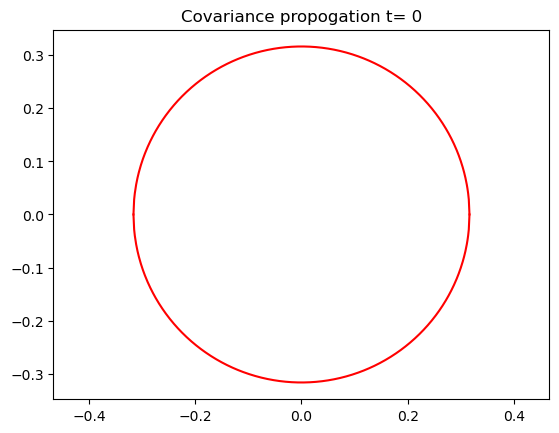

In [303]:
mean = np.array([0, 0, 0])
cov = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])
control = np.array([3, 1.5])
noise = np.array([[2, 0], [0, 0.1]])

upper, lower = create2Dellipse(mean[0:2], cov[0:2,0:2], 1, 1000)
plt.plot(upper[0,:], upper[1, :], color='red')
plt.plot(lower[0, :], lower[1, :], color='red')
plt.axis('equal')
plt.title('Covariance propogation t= 0')
plt.show()

/var/folders/_3/5n1k89jd143c_0ppj1d2_f2m0000gn/T/ipykernel_23769/2975923210.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([[coord[0] + 0.5 * control[0] * np.cos(coord[2])], [coord[1] + 0.5 * control[0] * np.sin(coord[2])], coord[2] + 0.5 * control[1]])


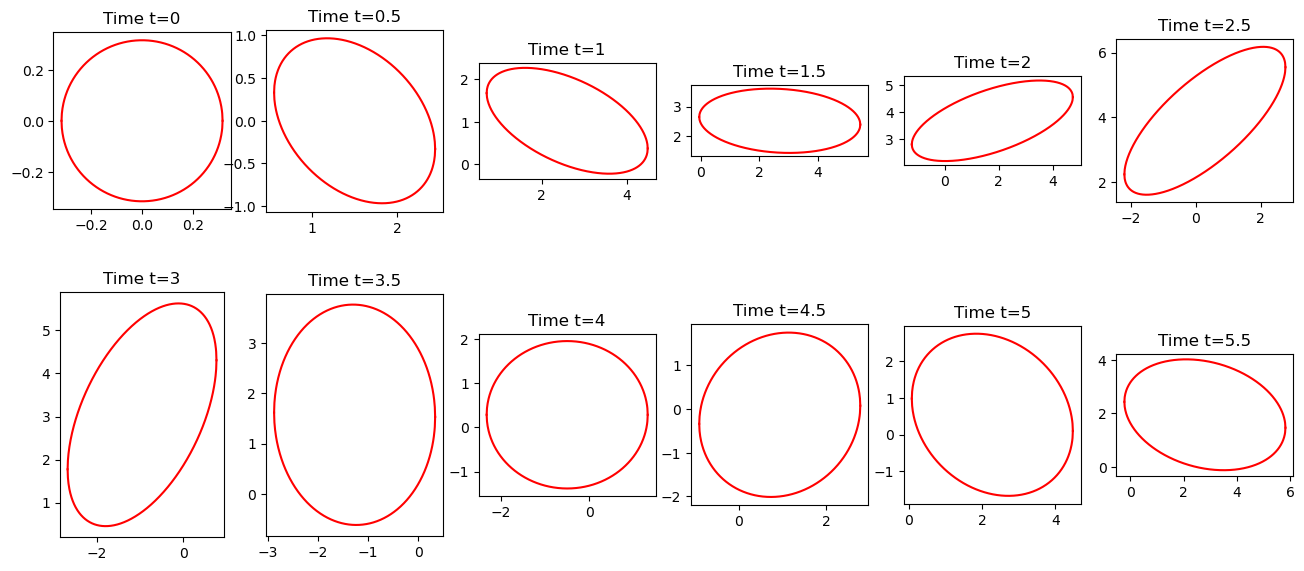

In [304]:
t_values = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
fig, axes = plt.subplots(ncols=(len(t_values))// 2,
                         nrows=2, figsize=(16, 7))

prev_mean = mean
prev_cov = cov
for p, ax in zip(t_values, axes.flat):
    if p == 0:
        upper, lower = create2Dellipse(mean[0:2], cov[0:2,0:2], 1, 1000)
    else:
        mean = calculate_mean(mean, control)
        cov = calculate_cov1(cov, noise, mean, control)
        upper, lower = create2Dellipse(mean[0:2], cov[0:2,0:2], 1, 1000)
        prev_mean = mean
        prev_cov = cov
    ax.plot(upper[0,:], upper[1, :], color='red')
    ax.plot(lower[0, :], lower[1, :], color='red')
    ax.set_aspect('equal')
    ax.set_title(f'Time t={p}')
plt.show()

Comments: Moving the noise from state space to action space change the behaviour of the platform. We can see that several iso-contours change their tilt angles.